In [ ]:
#pre screen algorithm for IMCI and CI

In [ ]:
%reset

In [38]:
import os 

In [1]:
import os 
import numpy as np
import pandas as pd
import math
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\py_other_methods\\GAIN-master')
%run -i gain.py
%run -i data_loader.py

# run notMIWAE
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\py_other_methods\\notMIWAE-master')
%run -i notMIWAE.py
%run -i trainer.py
%run -i runnotMIWAE.py
import trainer

  #import tensorflow as tf
import MIDASpy as md
import statistics
 
# mice
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
import scipy.stats.mstats as mstats


os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\py_other_methods\\')
import argparse
%run -i runGain.py    
%run -i runMida.py     

Instructions for updating:
non-resource variables are not supported in the long term


C:\Users\xiaoming\anaconda3\Lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
# not actually relu! could also be swish, but key is data is not normalized
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\source_code\\run_helpers\\')
%run -i setup.py
#%run -i runGRWAIN.py
%run -i runGRWINN.py

os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\source_code')
%run -i utilities.py 
%run -i make_missings.py


os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\source_code\\GRWAIN_test')
%run -i GRWAIN_3D.py

#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWI_GAN_NY\\Data\\real data\\mimic-iii-clinical-database-1.4\\processed')
#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWI_GAN_NY\\Data\\real data\\`cleaned_mimic')
 
# mice
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import kurtosis, skew
#from scipy.stats import RandomForestRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression     
import statsmodels.api as sm

# for screen

In [186]:
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\Simulations\\CI\\Clustered') 
#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWIGAN\\WGAN_IQ\\Data\\Simulations\\IM') 
fnames = ['AllPos1_{:0}.csv'.format(i) for i in range(1, 11)]
fnames_true = ['AllPos1_{:0}_True.csv'.format(i) for i in range(1, 11)]

In [ ]:
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\Simulations\\CI\\Clustered') 
#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWIGAN\\WGAN_IQ\\Data\\Simulations\\IM') 
fnames = ['PosNeg1_{:0}.csv'.format(i) for i in range(1, 11)]
fnames_true = ['PosNeg1_{:0}_True.csv'.format(i) for i in range(1, 11)]

In [190]:
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\Simulations\\IMCI\\Clustered') 
#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWIGAN\\WGAN_IQ\\Data\\Simulations\\IM') 
fnames = ['AllPos1_{:0}.csv'.format(i) for i in range(1, 11)]
fnames_true = ['AllPos1_{:0}_True.csv'.format(i) for i in range(1, 11)]

In [198]:
os.chdir('C:\\Users\\xiaoming\\Desktop\\makr he\\GRWAIN\\Simulations\\IMCI\\Clustered') 

fnames = ['PosNeg1_{:0}.csv'.format(i) for i in range(1, 51)]
fnames_true = ['PosNeg1_{:0}_True.csv'.format(i) for i in range(1, 51)]

function to generate missing, depepndent on log of the (normalized) data 

can also try on other datasets

In [4]:
def mae (imp, X_n):
    Msg = 1 - np.isnan(X_n)
    return   np.nanmean( (imp * Msg - X_n*Msg)**2) 

In [7]:
def mae50 (imp, X_n):
    Msg = 1 - np.isnan(X_n)
    return   np.nanmean( (imp [:,50:100]* Msg[:,50:100] - X_n[:,50:100]*Msg[:,50:100])**2) 

In [199]:
L=10

In [181]:
def screen (X):
    direction = np.ones(100)
    min_level = np.zeros(100)
    max_level = np.ones(100)
    
    for j in range(0, 19):
        y_pos = j * 5 + 4
        Y = X[:, y_pos]
        naY = 1 * np.isnan(Y)
        
        removena_X = X[:, j * 5 :(j * 5 + 4)]
        
        sm_model = sm.GLM(naY, sm.add_constant(removena_X), family=sm.families.Binomial())
        
        sm_result = sm_model.fit()
        coef = sm_result.params
        pvalue = sm_result.pvalues
        
        sign = np.sign(coef[pvalue<0.05])
        
        if sum(sign) > 0:
            Y = Y * -1

            direction[j * 5 + 4] = -1
            min_level[j * 5 + 4] = np.nanmin(Y)
            max_level[j * 5 + 4] = np.nanmax(Y)
            YY = (Y - np.nanmin(Y)) / (np.nanmax(Y) - np.nanmin(Y))
            X[:, y_pos] = YY
        
        
        norm_parameters = {'min_val': min_level,
                       'max_val': max_level}
    return X, direction, norm_parameters

In [134]:
def rescreen (X, direction, norm_parameters):
    _, dim = X.shape
    min_val = norm_parameters['min_val']
    max_val = norm_parameters['max_val']
    for i in range(dim):
        X[:, i] = (max_val[i] - min_val[i]) * X[:, i] + min_val[i]
    X = X * direction
    return X

can also try on other datasets

L=1

In [203]:
# normalized
nGAIN_error = [0]*L
nWRINN_error = [0]*L
nnMIWAE_error = [0]*L
nmida_error = [0]*L
nmean_error = [0]*L
nmice_error = [0]*L

In [201]:
# GRIN and 
for k in range(0,L):    
    #Xna = make_missing_halfIM80 (X_skew)
    Xna = (np.array(pd.read_csv(fnames[k], header = None)))
    X_tru = (np.array(pd.read_csv(fnames_true[k], header = None)))
    Xna[Xna== -99] = np.nan
    
    Xna1, direction, nask_param1 = screen(Xna)
    
    Xnna, nask_param = normalization(Xna)
    ## for other methods
    
    
    Xnna1, nask_param1_1 = normalization(Xna1)
    
    Mask = 1 - np.isnan(Xna)
    G_impu = GRWAIN  (Xnna1.copy(), Mask,{'batch_size': round( np.shape(Xnna1)[0]/4),  
                                    'iterations':300}, 100)
    xhat_record = G_impu[1]
    GRIN_fit = np.mean(xhat_record, axis=0)
    #GRIN_fit = (np.mean(xhat_record, axis=0) +  GRWINN_impu[0])/2
    
    Imp = IterativeImputer(max_iter=15, random_state=0)    
    Imp.fit( Xna )
    mice_impu = Imp.transform( Xna )
    mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imp.fit(Xna)
    mean_impu = mean_imp.transform( Xna)

    Gain_fit = (runGain_direct ( Xna ,  round( np.shape(Xna)[0]/4), 100, 500 ) ) # 2 = batchsize, 3 =alpha
    nMiwae_fit = run_notMIWAE(    Xna ,n_hidden=8)   
    MIDA_fit =  runMida_direct (   Xnna )  
     
    nWRINN_error[k] =mae(  rescreen(renormalization( GRIN_fit, nask_param1_1),direction, nask_param1)   ,X_tru) 
    nGAIN_error[k] = mae(  Gain_fit , X_tru)     
    nnMIWAE_error[k]= mae( nMiwae_fit , X_tru)
    nmida_error[k] = mae(  renormalization( MIDA_fit ,nask_param )  , X_tru)
    nmice_error[k] = mae(mice_impu , X_tru)
    nmean_error[k] = mae( mean_impu   ,X_tru)

100%|██████████| 500/500 [00:01<00:00, 297.27it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 134.34 train_loss, 134.77 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.669149080912273
Epoch: 1 , loss: 25.64904742770725
Epoch: 2 , loss: 24.97550943162706
Epoch: 3 , loss: 24.361718283759224
Epoch: 4 , loss: 23.669435183207195
Epoch: 5 , loss: 22.95769034491645
Epoch: 6 , loss: 22.11643886566162
Epoch: 7 , loss: 20.748211012946236
Epoch: 8 , loss: 19.441454145643448
Epoch: 9 , loss: 18.190873463948567
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 296.78it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.22 s, 135.43 train_loss, 135.30 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.294283443027073
Epoch: 1 , loss: 26.245013660854763
Epoch: 2 , loss: 25.633485476175945
Epoch: 3 , loss: 25.021491368611652
Epoch: 4 , loss: 24.245861795213486
Epoch: 5 , loss: 23.565059026082356
Epoch: 6 , loss: 22.618156750996906
Epoch: 7 , loss: 21.052754084269207
Epoch: 8 , loss: 19.638642734951443
Epoch: 9 , loss: 18.423510975307888
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 300.69it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.19 s, 136.82 train_loss, 135.70 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.703054640028213
Epoch: 1 , loss: 25.791345490349663
Epoch: 2 , loss: 25.09583928849962
Epoch: 3 , loss: 24.52824550204807
Epoch: 4 , loss: 23.828189637925888
Epoch: 5 , loss: 23.12771595848931
Epoch: 6 , loss: 22.363932291666668
Epoch: 7 , loss: 20.917880376180012
Epoch: 8 , loss: 19.68225712246365
Epoch: 9 , loss: 18.393367343478733
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 290.29it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.20 s, 134.91 train_loss, 134.40 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.469981617397732
Epoch: 1 , loss: 25.438558684455025
Epoch: 2 , loss: 24.711729367574055
Epoch: 3 , loss: 24.10997994740804
Epoch: 4 , loss: 23.488521681891548
Epoch: 5 , loss: 22.75501759847005
Epoch: 6 , loss: 21.82062096065945
Epoch: 7 , loss: 20.34606319003635
Epoch: 8 , loss: 19.1238218943278
Epoch: 9 , loss: 17.87286641862657
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 253.09it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.23 s, 135.58 train_loss, 136.03 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.922924571567112
Epoch: 1 , loss: 25.944671630859375
Epoch: 2 , loss: 25.303104294670952
Epoch: 3 , loss: 24.593854268391926
Epoch: 4 , loss: 24.018741395738388
Epoch: 5 , loss: 23.219636811150444
Epoch: 6 , loss: 22.342668109469944
Epoch: 7 , loss: 20.81057749854194
Epoch: 8 , loss: 19.612019750807022
Epoch: 9 , loss: 18.245261934068466
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 278.74it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 136.70 train_loss, 135.43 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.054663976033527
Epoch: 1 , loss: 26.243456840515137
Epoch: 2 , loss: 25.523115158081055
Epoch: 3 , loss: 24.88662518395318
Epoch: 4 , loss: 24.173442946539986
Epoch: 5 , loss: 23.42182403140598
Epoch: 6 , loss: 22.459702915615505
Epoch: 7 , loss: 20.859259817335342
Epoch: 8 , loss: 19.58148871527778
Epoch: 9 , loss: 18.370519744025337
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 284.43it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 135.96 train_loss, 135.88 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.23040919833713
Epoch: 1 , loss: 26.298425674438477
Epoch: 2 , loss: 25.650070508321125
Epoch: 3 , loss: 24.993421766493057
Epoch: 4 , loss: 24.288194126553005
Epoch: 5 , loss: 23.5509033203125
Epoch: 6 , loss: 22.70875400967068
Epoch: 7 , loss: 21.264167149861652
Epoch: 8 , loss: 19.904640091790093
Epoch: 9 , loss: 18.749595748053657
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 293.80it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.22 s, 135.82 train_loss, 134.53 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.314561737908257
Epoch: 1 , loss: 25.455685509575737
Epoch: 2 , loss: 24.732892672220867
Epoch: 3 , loss: 24.12605921427409
Epoch: 4 , loss: 23.45634587605794
Epoch: 5 , loss: 22.69744618733724
Epoch: 6 , loss: 21.930892944335938
Epoch: 7 , loss: 20.49962838490804
Epoch: 8 , loss: 19.28518549601237
Epoch: 9 , loss: 18.07170624203152
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 297.50it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.19 s, 134.57 train_loss, 135.61 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.64595392015245
Epoch: 1 , loss: 25.677718268500435
Epoch: 2 , loss: 24.958201196458603
Epoch: 3 , loss: 24.422622786627876
Epoch: 4 , loss: 23.67497793833415
Epoch: 5 , loss: 22.9613774617513
Epoch: 6 , loss: 22.191419389512802
Epoch: 7 , loss: 20.660413212246365
Epoch: 8 , loss: 19.485988510979546
Epoch: 9 , loss: 18.236157417297363
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 297.22it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.19 s, 134.81 train_loss, 135.32 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.40649202134874
Epoch: 1 , loss: 26.444029384189182
Epoch: 2 , loss: 25.782706790500217
Epoch: 3 , loss: 25.099117914835613
Epoch: 4 , loss: 24.423846774631077
Epoch: 5 , loss: 23.639454947577583
Epoch: 6 , loss: 22.708307372199165
Epoch: 7 , loss: 21.095844798617893
Epoch: 8 , loss: 19.805599212646484
Epoch: 9 , loss: 18.493789037068684
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


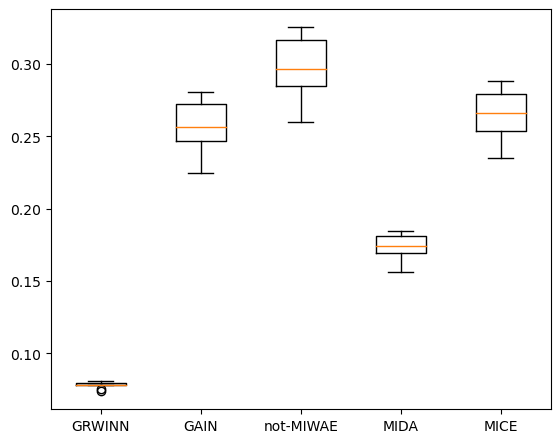

In [189]:
# CI all pos with screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

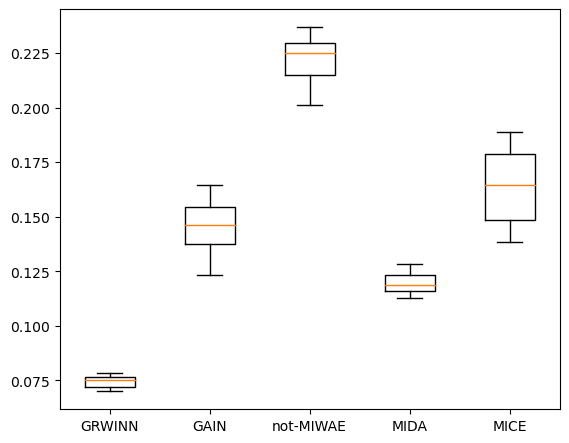

In [185]:
# CI posneg with screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

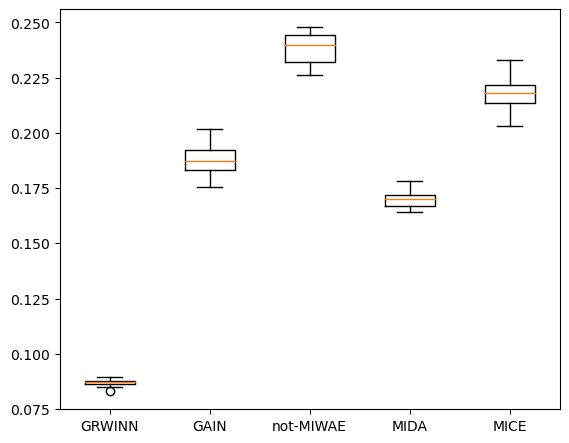

In [194]:
# IMCI all pos with screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

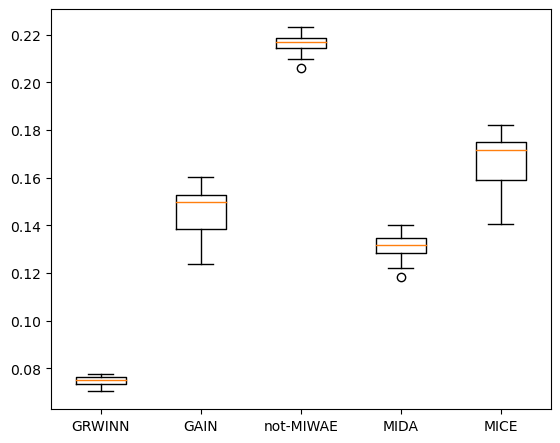

In [202]:
# IMCI pos neg with screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

In [204]:
# GRIN and 
for k in range(0,L):    
    #Xna = make_missing_halfIM80 (X_skew)
    Xna = (np.array(pd.read_csv(fnames[k], header = None)))
    X_tru = (np.array(pd.read_csv(fnames_true[k], header = None)))
    Xna[Xna== -99] = np.nan
    
    Xnna,nask_param = normalization(Xna)
    Mask = 1 - np.isnan(Xna)
    G_impu = GRWAIN  (Xnna.copy(), Mask,{'batch_size': round( np.shape(Xnna)[0]/4),  
                                    'iterations':300}, 100)
    xhat_record = G_impu[1]
    GRIN_fit = np.mean(xhat_record, axis=0)
    #GRIN_fit = (np.mean(xhat_record, axis=0) +  GRWINN_impu[0])/2
    
    Imp = IterativeImputer(max_iter=15, random_state=0)    
    Imp.fit( Xna )
    mice_impu = Imp.transform( Xna )
    mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imp.fit(Xna)
    mean_impu = mean_imp.transform( Xna)

    Gain_fit = (runGain_direct ( Xna ,  round( np.shape(Xna)[0]/4), 100, 500 ) ) # 2 = batchsize, 3 =alpha
    nMiwae_fit = run_notMIWAE(    Xna ,n_hidden=8)   
    MIDA_fit =  runMida_direct (   Xnna )  
     
    nWRINN_error[k] =mae(  renormalization( GRIN_fit, nask_param)  ,X_tru) 
    nGAIN_error[k] = mae(  Gain_fit , X_tru)     
    nnMIWAE_error[k]= mae( nMiwae_fit , X_tru)
    nmida_error[k] = mae(  renormalization( MIDA_fit ,nask_param )  , X_tru)
    nmice_error[k] = mae(mice_impu , X_tru)
    nmean_error[k] = mae( mean_impu   ,X_tru)

100%|██████████| 500/500 [00:01<00:00, 288.24it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.22 s, 131.80 train_loss, 132.30 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.699333720737034
Epoch: 1 , loss: 24.67433961232503
Epoch: 2 , loss: 24.034640418158638
Epoch: 3 , loss: 23.43054485321045
Epoch: 4 , loss: 22.727471987406414
Epoch: 5 , loss: 22.03798007965088
Epoch: 6 , loss: 21.228334850735134
Epoch: 7 , loss: 20.00999821556939
Epoch: 8 , loss: 18.70431571536594
Epoch: 9 , loss: 17.4529144499037
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 301.96it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 134.29 train_loss, 133.86 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.304694811503094
Epoch: 1 , loss: 25.272055202060276
Epoch: 2 , loss: 24.663211716545952
Epoch: 3 , loss: 24.03121429019504
Epoch: 4 , loss: 23.298179308573406
Epoch: 5 , loss: 22.631072150336372
Epoch: 6 , loss: 21.740084436204697
Epoch: 7 , loss: 20.250951449076336
Epoch: 8 , loss: 18.893550448947483
Epoch: 9 , loss: 17.67323896620009
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 291.38it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.24 s, 133.74 train_loss, 132.65 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.395203484429253
Epoch: 1 , loss: 24.449179225497776
Epoch: 2 , loss: 23.77740266587999
Epoch: 3 , loss: 23.224716822306316
Epoch: 4 , loss: 22.526821030510796
Epoch: 5 , loss: 21.84890545739068
Epoch: 6 , loss: 21.12532965342204
Epoch: 7 , loss: 19.850784301757812
Epoch: 8 , loss: 18.629964086744522
Epoch: 9 , loss: 17.391684850056965
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 284.31it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 133.40 train_loss, 132.66 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.704893112182617
Epoch: 1 , loss: 24.687881151835125
Epoch: 2 , loss: 23.961974885728623
Epoch: 3 , loss: 23.348269356621635
Epoch: 4 , loss: 22.735083474053276
Epoch: 5 , loss: 22.017309612698025
Epoch: 6 , loss: 21.105736626519096
Epoch: 7 , loss: 19.679271592034233
Epoch: 8 , loss: 18.461265987820095
Epoch: 9 , loss: 17.2098200056288
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 292.22it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.20 s, 133.03 train_loss, 133.19 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.815949969821506
Epoch: 1 , loss: 24.837027973598904
Epoch: 2 , loss: 24.233074294196236
Epoch: 3 , loss: 23.5070858001709
Epoch: 4 , loss: 22.93720319535997
Epoch: 5 , loss: 22.136109246148003
Epoch: 6 , loss: 21.3060237036811
Epoch: 7 , loss: 19.901727464463974
Epoch: 8 , loss: 18.672158029344345
Epoch: 9 , loss: 17.33541753556993
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 274.92it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.25 s, 135.48 train_loss, 134.24 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.907327546013725
Epoch: 1 , loss: 25.115606202019585
Epoch: 2 , loss: 24.400713178846573
Epoch: 3 , loss: 23.756322436862522
Epoch: 4 , loss: 23.049923155042862
Epoch: 5 , loss: 22.3452214135064
Epoch: 6 , loss: 21.475088119506836
Epoch: 7 , loss: 19.988447189331055
Epoch: 8 , loss: 18.740243275960285
Epoch: 9 , loss: 17.51715766059028
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 266.23it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.25 s, 133.07 train_loss, 133.10 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.918258772956
Epoch: 1 , loss: 25.009474754333496
Epoch: 2 , loss: 24.366833262973362
Epoch: 3 , loss: 23.711686664157444
Epoch: 4 , loss: 23.027391751607258
Epoch: 5 , loss: 22.332870483398438
Epoch: 6 , loss: 21.528324762980144
Epoch: 7 , loss: 20.287407451205784
Epoch: 8 , loss: 18.95149188571506
Epoch: 9 , loss: 17.82655514611138
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 295.19it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.21 s, 134.37 train_loss, 133.36 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.492020395067
Epoch: 1 , loss: 24.616275045606827
Epoch: 2 , loss: 23.918102476331924
Epoch: 3 , loss: 23.31866391499837
Epoch: 4 , loss: 22.636099179585774
Epoch: 5 , loss: 21.919970088534885
Epoch: 6 , loss: 21.17975966135661
Epoch: 7 , loss: 19.887787712944878
Epoch: 8 , loss: 18.686342345343697
Epoch: 9 , loss: 17.45552698771159
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 281.66it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.25 s, 133.12 train_loss, 133.64 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 25.58476776546902
Epoch: 1 , loss: 24.60476589202881
Epoch: 2 , loss: 23.8818941116333
Epoch: 3 , loss: 23.377687984042698
Epoch: 4 , loss: 22.62708526187473
Epoch: 5 , loss: 21.939963870578342
Epoch: 6 , loss: 21.187475204467773
Epoch: 7 , loss: 19.823760350545246
Epoch: 8 , loss: 18.66454103257921
Epoch: 9 , loss: 17.42064168718126
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


100%|██████████| 500/500 [00:01<00:00, 285.92it/s]
C:\Users\xiaoming\Desktop\makr he\GRWAIN\py_other_methods\notMIWAE-master\runnotMIWAE.py:65: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  S = np.array(~np.isnan(data_x), dtype=np.float)


Creating graph...
Saving session...
Saving session...
0/100 updates, 0.22 s, 132.71 train_loss, 132.85 val_loss
0 / 300
Size index: [100]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 26.24133841196696
Epoch: 1 , loss: 25.239277521769207
Epoch: 2 , loss: 24.60762733883328
Epoch: 3 , loss: 23.92685381571452
Epoch: 4 , loss: 23.266277843051487
Epoch: 5 , loss: 22.54230848948161
Epoch: 6 , loss: 21.627764172024197
Epoch: 7 , loss: 20.156620237562393
Epoch: 8 , loss: 18.898326873779297
Epoch: 9 , loss: 17.630330403645832
Training complete. Saving file...
Model saved in file: tmp/MIDAS
INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


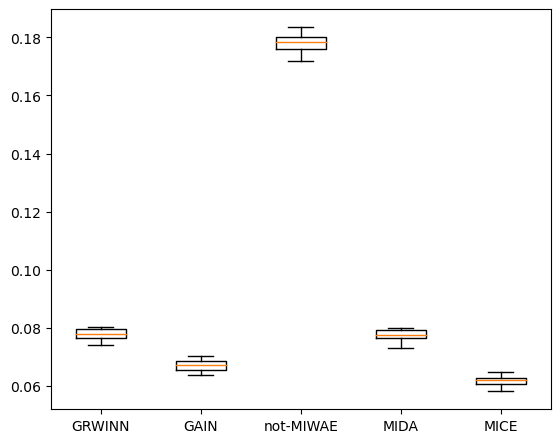

In [163]:
# CI all pos without screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

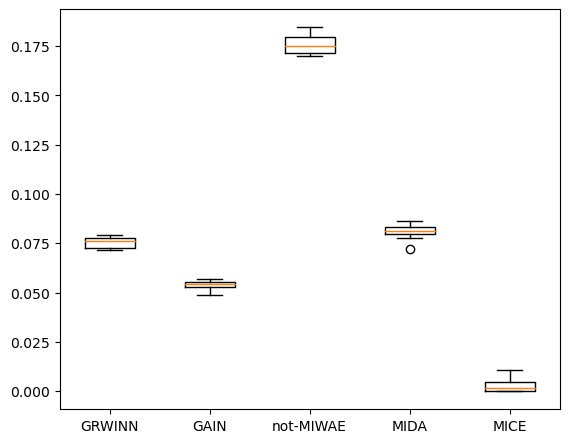

In [171]:
# CI posneg without screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

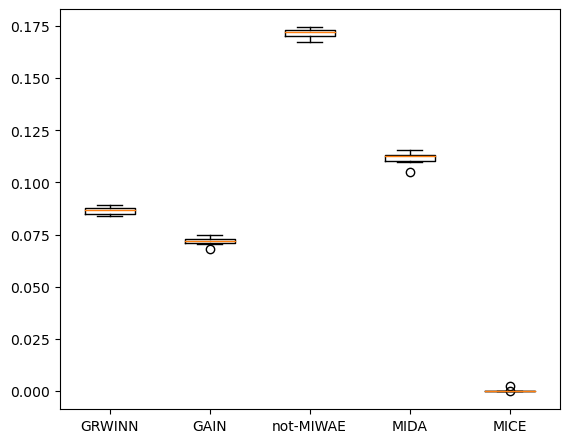

In [197]:
# IMCI all pos without screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

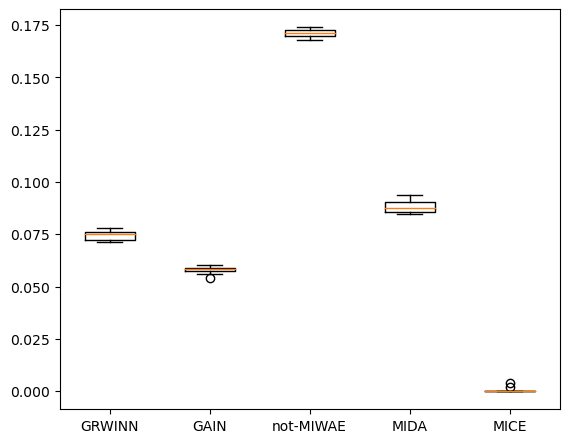

In [205]:
# IMCI posneg without screen 9.27
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

In [ ]:
# CI with screen
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

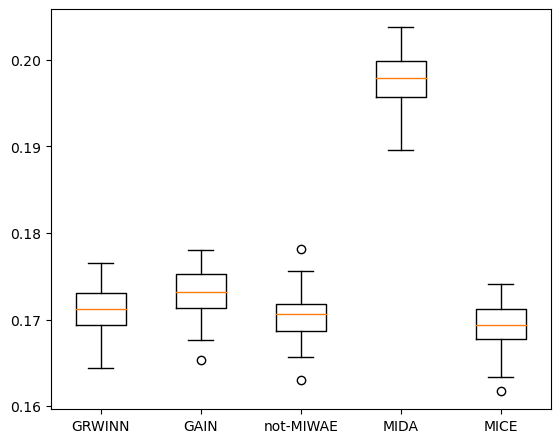

In [35]:
#IMa
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

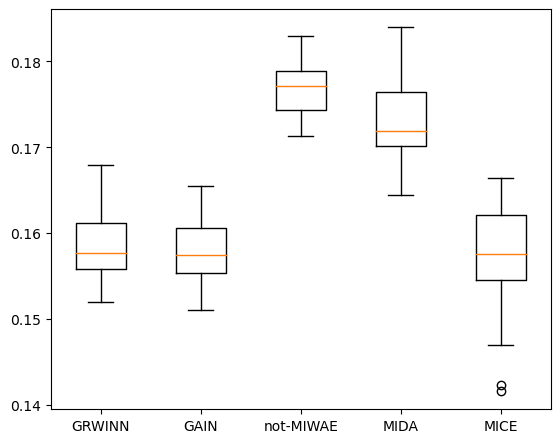

In [19]:
#IM T

## not converge
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

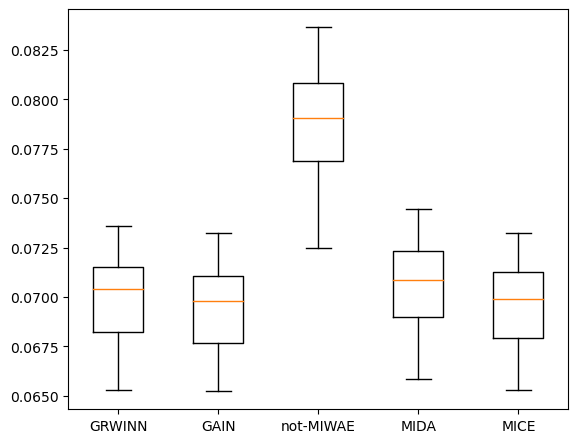

In [25]:
#IM cauchy
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

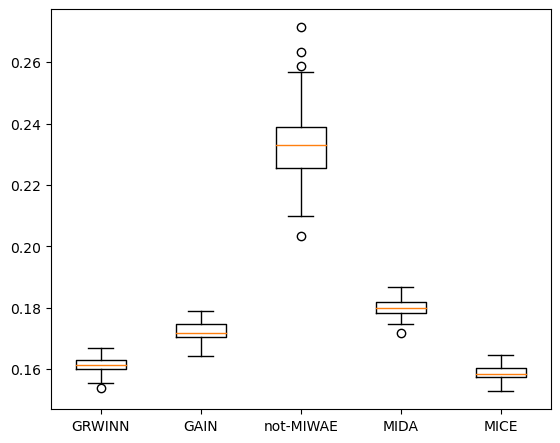

In [11]:
#true CI 50
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

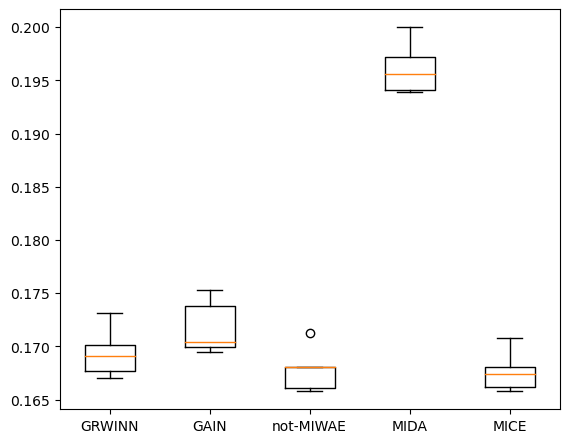

In [24]:
#GRWINN_3D-a
nErrors = [np.sqrt(nWRINN_error) , np.sqrt(nGAIN_error) , 
             np.sqrt(nnMIWAE_error),
           np.sqrt(nmida_error) ,# np.sqrt(nmean_error) ,
           np.sqrt(nmice_error)] 

#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(nErrors)
ax.set_xticklabels(['GRWINN', 'GAIN', 'not-MIWAE', 
                    'MIDA', #'mean',
                    'MICE'])     
# show plot
plt.show()

In [42]:
nErrors1 = nErrors

In [ ]:
from scipy.stats import wasserstein_distance
len(GRIN_log[3])

In [ ]:
10/1.5

In [ ]:
#'GRIN'+'4'+'.csv'
os.mkdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWI_GAN_NY\\Data\\INSIGHT\\sample_imputations\\MIMIC_missing3_B')


In [ ]:
#os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWI_GAN_NY\\Data\\INSIGHT\\sample_imputations\\MIMIC_missing3_multi')
np.savetxt('X_n.csv', X_skew, delimiter=",")


In [ ]:

os.chdir('C:\\Users\\markh\\Dropbox\\Columbia\\RWI_GAN_NY\\Data\\INSIGHT\\sample_imputations\\MIMIC_missing3')

np.savetxt('GRIN.csv', (GRIN_log[2]), delimiter=",")
np.savetxt('GAIN.csv' , (Gainlog[2]), delimiter=",")
np.savetxt('nMIWAE.csv', (nMiwaelog[2]), delimiter=",")
np.savetxt('MIDA.csv' , (MIDAlog[2]), delimiter=",")
np.savetxt('MICE.csv' , (micelog[2]), delimiter=",")
np.savetxt('Mean.csv' , (meanlog[2]), delimiter=",")

np.savetxt('Xna.csv', Xna, delimiter=",")
np.savetxt('X_n.csv', X_skew, delimiter=",")


In [ ]:
X_tru[0]

In [ ]:
X_imp = GRIN_log[0]

In [ ]:
wasserstein_distance(X_imp[0], X_tru[0], u_weights=None, v_weights=None)[source]


In [ ]:
scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)[source]


In [ ]:
scipy.stats.wasserstein_distance(u_values, v_values, u_weights=None, v_weights=None)[source]


In [ ]:
X_n = X_skew

In [ ]:
L = 4
GAIN_error = [0]*L
WRINN_error = [0]*L
nMIWAE_error = [0]*L
mida_error = [0]*L
mean_error = [0]*L
mice_error = [0]*L

for k in range(0,L):    
    WRINN_error[k] =mae(GRIN_log[k],X_n) 
    GAIN_error[k] =mae(Gainlog[k] , X_n)     
    nMIWAE_error[k] = mae(nMiwaelog[k], X_n)
    mida_error[k] = mae(MIDAlog[k], X_n)
    mice_error[k] = mae(micelog[k], X_n)
    mean_error[k] = mae(meanlog[k], X_n)

In [ ]:
#Errors = [GRIN_log, Gainlog, nMiwaelog,MIDAlog, meanlog  ,micelog ] 
Errors = [WRINN_error, GAIN_error, #nMIWAE_error,
          mida_error, mean_error, mice_error] 
#set.ylim(0, .005)   
fig = plt.figure (figsize = (5,4))
ax = fig.add_axes([0, 0, 1, 1])
 
bp = ax.boxplot(Errors)
ax.set_xticklabels(['GRWINN', 'GAIN', #'not-MIWAE', 
                    'MIDA', 'mean','MICE']) 
# show plot
plt.show()

In [ ]:
X_tru = renormalization( X_skew, sk_param)

ORIGINAL - ALL NORMALIZED

In [ ]:
for k in range(0,4):    
    Xna = make_missing (X_skew)
    #Xna = make_missing_3 (X_skew)

    Mask = 1 - np.isnan(Xna)

    GRWINN_impu = GRWINN_sigmoid  (Xna.copy(), Mask,{'batch_size': round( np.shape(Xna)[0]/4),  
                                    'iterations':1000}, 50)
    xhat_record = GRWINN_impu[1]
    GRIN_fit = np.mean(xhat_record, axis=0)
    #GRIN_fit = (np.mean(xhat_record, axis=0) +  GRWINN_impu[0])/2
    
    
    Imp = IterativeImputer(max_iter=15, random_state=0)    
    Imp.fit( Xna )
    mice_impu = Imp.transform( Xna )
    mean_imp = SimpleImputer(missing_values=np.nan, strategy='mean')
    mean_imp.fit(Xna)
    mean_impu = mean_imp.transform( Xna)

    Gain_fit = (runGain_direct ( Xna ,  round( np.shape(Xna)[0]/4), 100, 500 ) ) # 2 = batchsize, 3 =alpha
    
    nMiwae_fit = run_notMIWAE(    Xna ,n_hidden=8)   
    
    X_nMida , param_Mida = normalization( Xna  ) # here it is normalized
    MIDA_fit =  runMida_direct (   X_nMida )  
    MIDA_fit2 = renormalization(MIDA_fit, param_Mida)

   # MIDA_fit = (runMida_direct (   Xna )   )
    GRIN_log.append( GRIN_fit )
    Gainlog.append(  Gain_fit ) 
    meanlog.append( mean_impu )  
    micelog.append( mice_impu)
    
    nMiwaelog.append( nMiwae_fit )  
    MIDAlog.append( MIDA_fit2 )  

In [ ]:
#np.shape((GRIN_log[0][:,i], Xna[:,i], X_n[:,i]))
verif_i = np.array([GRIN_log[0][:,i], Xna[:,i], X_n[:,i]]).T
sub = np.where( 1 - np.isnan(  X_n[:,i] ) )[0]
V1 = verif_i [sub, :]
V2 = V1[np.where( np.isnan(  V1[:,1] ) )[0]]

pd.DataFrame(V2)

In [ ]:
y_pos = 94
Y = Xna[:, y_pos]
Y = 1 * np.isnan(Y)
index2 = np.isnan(Xna).any(axis=0)
removena_X = np.delete(Xna, index2, axis=1)

sm_model = sm.GLM(Y, sm.add_constant(removena_X), family=sm.families.Binomial())

sm_result = sm_model.fit()

sm_result.pvalues

sm_model = sm.GLM(Y, sm.add_constant(removena_X), family=sm.families.Binomial())
sm_result = sm_model.fit_regularized(method='elastic_net', alpha=0.001, L1_wt=1.0)
sm_result.tvalues